In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load the data

In [2]:
iris = datasets.load_iris()

In [3]:
# print(iris.DESCR)

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# add the target column
iris_df['Class'] = iris.target


np.unique(iris.target)
iris.target_names



array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:

# # add target names colun
labels = iris.target_names
print(f'labels: {labels}')

iris_df['ClassName'] = iris_df['Class'].apply(lambda el: iris.target_names[el])

iris_df.tail()



labels: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,ClassName
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


## Get insight of the data (Prepare and clean)

In [6]:
# lets check how many rows we have per each class:
values, counts = np.unique(iris_df.Class, return_counts=True)
print('values: {}, counts: {}'.format(values, counts))

# or you can use the more visual:
# iris_df.groupby('ClassName').count()

values: [0 1 2], counts: [50 50 50]


### Correlation matrix

In [7]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Class,0.782561,-0.426658,0.949035,0.956547,1.000000


## Select features

In [8]:
# we will use the first two columns for features (they are not the best choice, we just want to test the algorithm)
f1 = 0
f2 = 1

X = iris_df.iloc[0:,[f1,f2]]
print(f'X shape: {X.shape}')

y = iris_df['Class']
print(f'y shape: {y.shape}')

X shape: (150, 2)
y shape: (150,)


## Visualize the data

In [9]:
def plot_data_set(X,y):    
    classes = np.unique(y)
    for c in classes:
        X_new = X[y==c]
        plt.scatter(X_new.iloc[:, 0], X_new.iloc[:, 1], 
                    edgecolors='gray', 
                    label = classes[c],
                    cmap=plt.cm.coolwarm, alpha=0.7
        )

        plt.xlabel('X[0]')
        plt.ylabel('X[1]')
        plt.legend(loc='best')


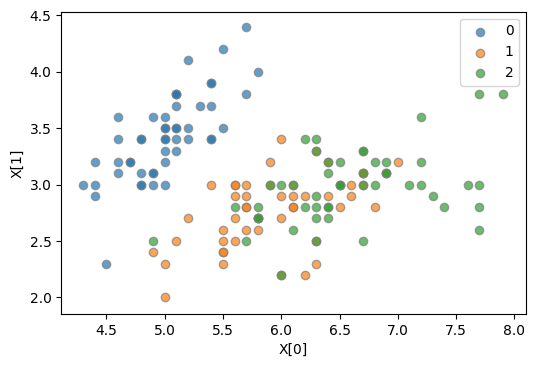

In [10]:
plt.figure(dpi=100)
plot_data_set(X,y)

Yes, our features are not good enough, but let's just keep playing...

In [11]:
# let's reserv 20% of the data for test:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (120, 2)
X_test shape: (30, 2)
y_train shape: (120,)
y_test shape: (30,)


## Choose the model

We want to test the SVM:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [12]:
clf = svm.SVC(kernel="linear", C=2)

## Train

In [13]:
clf.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### inspect the model

In [14]:
# get support vectors
sv = clf.support_vectors_
print(f'SV shape: {sv.shape}')

SV shape: (67, 2)


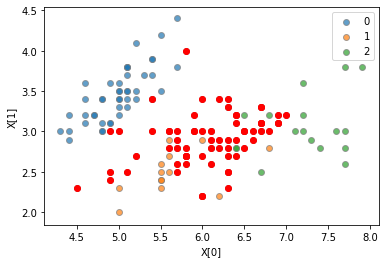

In [15]:
# plot the data:
plot_data_set(X,y)

# plot the SV:
plt.scatter(sv[:,0], sv[:,1],c="red")

In [16]:
def plot_boundary(clf, X):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    # fig, ax = plt.subplots()  #create figure and axes
    plt.figure(1, figsize=(8, 5))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], zorder=10, cmap=plt.cm.Paired, edgecolors='k')

    plt.axis('tight')
    x_min = 2
    x_max = 4.2
    y_min = -4
    y_max = 4

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Pastel1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())    
    
    ax = plt.gca()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('Figure 1')
    
    plt.legend(['boundary', 'margin = {:.2f}'.format(margin)], 
               bbox_to_anchor=(1,1), 
               loc="upper left")

plt.show()

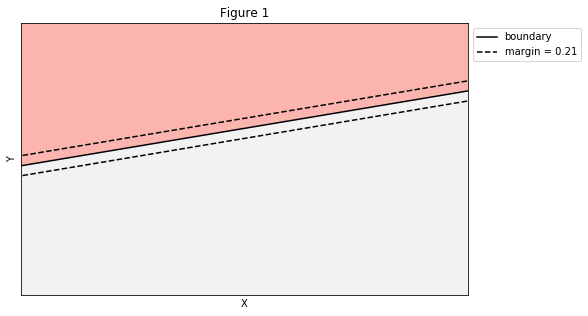

In [17]:
plot_boundary(clf,X.values)
plt.show()

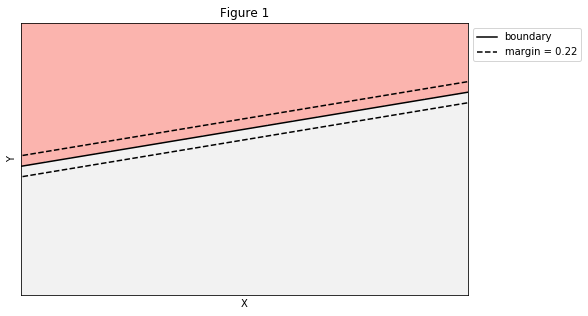

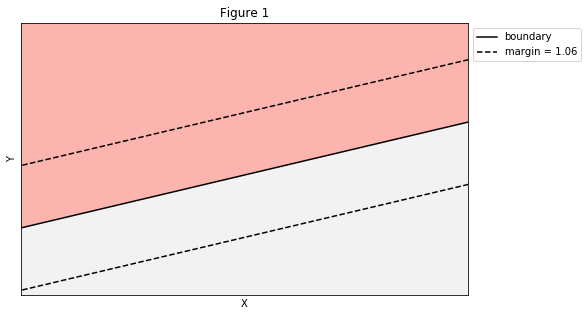

In [18]:
# plot boundery on different penality values
for name, penalty in (('unreg', 1), ('reg', 0.01)):
    # fit the model with each penality value:
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, y)
    
    plot_boundary(clf, X.values)

    plt.show()

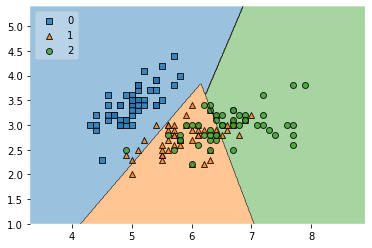

In [19]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, 
                      y.values,
                      clf=clf, 
                      legend=2)

## Predict

In [20]:
y_pred = clf.predict(X_test)

## Evaluating the Model

In [21]:
from sklearn import metrics

In [22]:
# Model Accuracy: 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [23]:
# Model Precision:
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))

Precision: 0.8774410774410775


In [24]:
# Model Recall: 
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Recall: 0.8666666666666667
